In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('NetflixViewingHistory.csv')
df

,Title,Date
0,Sobreviviendo a Escobar - Alias JJ: Episodio 1,30/1/23
1,Iron Man,27/1/23
2,Peaky Blinders: Temporada 5: Conmoción,27/1/23
3,Peaky Blinders: Temporada 5: El bucle,26/1/23
4,Peaky Blinders: Temporada 5: Estrategias,25/1/23
...,...,...
3589,Outlander,13/3/17
3590,Cosmos: A Spacetime Odyssey: Algunas de las co...,8/3/17
3591,Ali,5/3/17
3592,John Wick,5/3/17


In [3]:
df.head(35)

,Title,Date
0,Sobreviviendo a Escobar - Alias JJ: Episodio 1,30/1/23
1,Iron Man,27/1/23
2,Peaky Blinders: Temporada 5: Conmoción,27/1/23
3,Peaky Blinders: Temporada 5: El bucle,26/1/23
4,Peaky Blinders: Temporada 5: Estrategias,25/1/23
5,Peaky Blinders: Temporada 5: Gatos negros,24/1/23
6,Peaky Blinders: Temporada 5: Martes negro,24/1/23
7,Vikingos: Valhalla: Temporada 2: La hora de la...,23/1/23
8,Vikingos: Valhalla: Temporada 2: Pechenego,21/1/23
9,Vikingos: Valhalla: Temporada 2: Un acto de co...,20/1/23


In [4]:
df.info()

print('\n')
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3594 non-null   object
 1   Date    3594 non-null   object
dtypes: object(2)
memory usage: 56.3+ KB




(3594, 2)

In [5]:
list_sep = df['Title'].str.split(pat = ':', expand=False).to_frame()
list_sep

,Title
0,"[Sobreviviendo a Escobar - Alias JJ, Episodio 1]"
1,[Iron Man]
2,"[Peaky Blinders, Temporada 5, Conmoción]"
3,"[Peaky Blinders, Temporada 5, El bucle]"
4,"[Peaky Blinders, Temporada 5, Estrategias]"
...,...
3589,[Outlander]
3590,"[Cosmos, A Spacetime Odyssey, Algunas de las..."
3591,[Ali]
3592,[John Wick]


In [6]:
list_sep['num_part'] = list_sep['Title'].apply(len)
list_sep

,Title,num_part
0,"[Sobreviviendo a Escobar - Alias JJ, Episodio 1]",2
1,[Iron Man],1
2,"[Peaky Blinders, Temporada 5, Conmoción]",3
3,"[Peaky Blinders, Temporada 5, El bucle]",3
4,"[Peaky Blinders, Temporada 5, Estrategias]",3
...,...,...
3589,[Outlander],1
3590,"[Cosmos, A Spacetime Odyssey, Algunas de las...",3
3591,[Ali],1
3592,[John Wick],1


In [7]:
list_sep['num_part'].value_counts()

3    2068
2     801
1     370
4     345
5      10
Name: num_part, dtype: int64

In [8]:
list_sep['Tipo'] = np.where(list_sep['num_part'] < 3, 'Pelicula', 'Serie')
list_sep

,Title,num_part,Tipo
0,"[Sobreviviendo a Escobar - Alias JJ, Episodio 1]",2,Pelicula
1,[Iron Man],1,Pelicula
2,"[Peaky Blinders, Temporada 5, Conmoción]",3,Serie
3,"[Peaky Blinders, Temporada 5, El bucle]",3,Serie
4,"[Peaky Blinders, Temporada 5, Estrategias]",3,Serie
...,...,...,...
3589,[Outlander],1,Pelicula
3590,"[Cosmos, A Spacetime Odyssey, Algunas de las...",3,Serie
3591,[Ali],1,Pelicula
3592,[John Wick],1,Pelicula


In [9]:
df = pd.concat([df,list_sep['Tipo']], axis=1)
df

,Title,Date,Tipo
0,Sobreviviendo a Escobar - Alias JJ: Episodio 1,30/1/23,Pelicula
1,Iron Man,27/1/23,Pelicula
2,Peaky Blinders: Temporada 5: Conmoción,27/1/23,Serie
3,Peaky Blinders: Temporada 5: El bucle,26/1/23,Serie
4,Peaky Blinders: Temporada 5: Estrategias,25/1/23,Serie
...,...,...,...
3589,Outlander,13/3/17,Pelicula
3590,Cosmos: A Spacetime Odyssey: Algunas de las co...,8/3/17,Serie
3591,Ali,5/3/17,Pelicula
3592,John Wick,5/3/17,Pelicula


In [14]:
cols_sep = df['Title'].str.split(pat=':', expand=True)
cols_sep.columns =['part1', 'part2', 'part3', 'part4', 'part5']
cols_sep

,part1,part2,part3,part4,part5
0,Sobreviviendo a Escobar - Alias JJ,Episodio 1,None,None,None
1,Iron Man,None,None,None,None
2,Peaky Blinders,Temporada 5,Conmoción,None,None
3,Peaky Blinders,Temporada 5,El bucle,None,None
4,Peaky Blinders,Temporada 5,Estrategias,None,None
...,...,...,...,...,...
3589,Outlander,None,None,None,None
3590,Cosmos,A Spacetime Odyssey,Algunas de las cosas que hacen las moléculas,None,None
3591,Ali,None,None,None,None
3592,John Wick,None,None,None,None


In [15]:
df = pd.concat([df,cols_sep],axis=1)
df

,Title,Date,Tipo,part1,part2,part3,part4,part5
0,Sobreviviendo a Escobar - Alias JJ: Episodio 1,30/1/23,Pelicula,Sobreviviendo a Escobar - Alias JJ,Episodio 1,None,None,None
1,Iron Man,27/1/23,Pelicula,Iron Man,None,None,None,None
2,Peaky Blinders: Temporada 5: Conmoción,27/1/23,Serie,Peaky Blinders,Temporada 5,Conmoción,None,None
3,Peaky Blinders: Temporada 5: El bucle,26/1/23,Serie,Peaky Blinders,Temporada 5,El bucle,None,None
4,Peaky Blinders: Temporada 5: Estrategias,25/1/23,Serie,Peaky Blinders,Temporada 5,Estrategias,None,None
...,...,...,...,...,...,...,...,...
3589,Outlander,13/3/17,Pelicula,Outlander,None,None,None,None
3590,Cosmos: A Spacetime Odyssey: Algunas de las co...,8/3/17,Serie,Cosmos,A Spacetime Odyssey,Algunas de las cosas que hacen las moléculas,None,None
3591,Ali,5/3/17,Pelicula,Ali,None,None,None,None
3592,John Wick,5/3/17,Pelicula,John Wick,None,None,None,None


In [24]:
#df['Fecha'] = pd.to_datetime(df['Date'])
#df.drop(df['Date'],axis=1, inplace=True)
#df.drop('Date',axis=1, inplace=True)
#df.rename(columns={'Title':'Titulo'},inplace=True)
df


,Title,Tipo,part1,part2,part3,part4,part5,Fecha
0,Sobreviviendo a Escobar - Alias JJ: Episodio 1,Pelicula,Sobreviviendo a Escobar - Alias JJ,Episodio 1,None,None,None,2023-01-30
1,Iron Man,Pelicula,Iron Man,None,None,None,None,2023-01-27
2,Peaky Blinders: Temporada 5: Conmoción,Serie,Peaky Blinders,Temporada 5,Conmoción,None,None,2023-01-27
3,Peaky Blinders: Temporada 5: El bucle,Serie,Peaky Blinders,Temporada 5,El bucle,None,None,2023-01-26
4,Peaky Blinders: Temporada 5: Estrategias,Serie,Peaky Blinders,Temporada 5,Estrategias,None,None,2023-01-25
...,...,...,...,...,...,...,...,...
3589,Outlander,Pelicula,Outlander,None,None,None,None,2017-03-13
3590,Cosmos: A Spacetime Odyssey: Algunas de las co...,Serie,Cosmos,A Spacetime Odyssey,Algunas de las cosas que hacen las moléculas,None,None,2017-08-03
3591,Ali,Pelicula,Ali,None,None,None,None,2017-05-03
3592,John Wick,Pelicula,John Wick,None,None,None,None,2017-05-03


In [25]:
df.set_index('Fecha',inplace=True)
df

,Title,Tipo,part1,part2,part3,part4,part5
Fecha,,,,,,,
2023-01-30,Sobreviviendo a Escobar - Alias JJ: Episodio 1,Pelicula,Sobreviviendo a Escobar - Alias JJ,Episodio 1,None,None,None
2023-01-27,Iron Man,Pelicula,Iron Man,None,None,None,None
2023-01-27,Peaky Blinders: Temporada 5: Conmoción,Serie,Peaky Blinders,Temporada 5,Conmoción,None,None
2023-01-26,Peaky Blinders: Temporada 5: El bucle,Serie,Peaky Blinders,Temporada 5,El bucle,None,None
2023-01-25,Peaky Blinders: Temporada 5: Estrategias,Serie,Peaky Blinders,Temporada 5,Estrategias,None,None
...,...,...,...,...,...,...,...
2017-03-13,Outlander,Pelicula,Outlander,None,None,None,None
2017-08-03,Cosmos: A Spacetime Odyssey: Algunas de las co...,Serie,Cosmos,A Spacetime Odyssey,Algunas de las cosas que hacen las moléculas,None,None
2017-05-03,Ali,Pelicula,Ali,None,None,None,None


In [26]:
def fechas(data):
    data['año'] = data.index.year
    data['mes'] = data.index.month_name()
    data['dia_mes'] = data.index.day
    data['dia_semana'] = data.index.day_name()
    
    return(data)

In [27]:
fechas(df)

,Title,Tipo,part1,part2,part3,part4,part5,año,mes,dia_mes,dia_semana
Fecha,,,,,,,,,,,
2023-01-30,Sobreviviendo a Escobar - Alias JJ: Episodio 1,Pelicula,Sobreviviendo a Escobar - Alias JJ,Episodio 1,None,None,None,2023,January,30,Monday
2023-01-27,Iron Man,Pelicula,Iron Man,None,None,None,None,2023,January,27,Friday
2023-01-27,Peaky Blinders: Temporada 5: Conmoción,Serie,Peaky Blinders,Temporada 5,Conmoción,None,None,2023,January,27,Friday
2023-01-26,Peaky Blinders: Temporada 5: El bucle,Serie,Peaky Blinders,Temporada 5,El bucle,None,None,2023,January,26,Thursday
2023-01-25,Peaky Blinders: Temporada 5: Estrategias,Serie,Peaky Blinders,Temporada 5,Estrategias,None,None,2023,January,25,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
2017-03-13,Outlander,Pelicula,Outlander,None,None,None,None,2017,March,13,Monday
2017-08-03,Cosmos: A Spacetime Odyssey: Algunas de las co...,Serie,Cosmos,A Spacetime Odyssey,Algunas de las cosas que hacen las moléculas,None,None,2017,August,3,Thursday
2017-05-03,Ali,Pelicula,Ali,None,None,None,None,2017,May,3,Wednesday


In [36]:
to_rep1 = {'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'}

to_rep2 = {'January','February','March','April','May','June',
          'July','August','September','October','November','December'}

vals1 = {'Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'}

vals2 = {'Enero','Febrero','Marzo','Abril','Mayo','Junio',
        'Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'}

#to_rep = [to_rep1, to_rep2]

#vals = [vals1, vals2]

df.replace(to_replace=to_rep1, value=vals1, inplace=True)
df.replace(to_replace=to_rep2, value=vals2, inplace=True)

df

,Title,Tipo,part1,part2,part3,part4,part5,año,mes,dia_mes,dia_semana
Fecha,,,,,,,,,,,
2023-01-30,Sobreviviendo a Escobar - Alias JJ: Episodio 1,Pelicula,Sobreviviendo a Escobar - Alias JJ,Episodio 1,None,None,None,2023,Julio,30,Domingo
2023-01-27,Iron Man,Pelicula,Iron Man,None,None,None,None,2023,Julio,27,Viernes
2023-01-27,Peaky Blinders: Temporada 5: Conmoción,Serie,Peaky Blinders,Temporada 5,Conmoción,None,None,2023,Julio,27,Viernes
2023-01-26,Peaky Blinders: Temporada 5: El bucle,Serie,Peaky Blinders,Temporada 5,El bucle,None,None,2023,Julio,26,Lunes
2023-01-25,Peaky Blinders: Temporada 5: Estrategias,Serie,Peaky Blinders,Temporada 5,Estrategias,None,None,2023,Julio,25,Martes
...,...,...,...,...,...,...,...,...,...,...,...
2017-03-13,Outlander,Pelicula,Outlander,None,None,None,None,2017,Abril,13,Domingo
2017-08-03,Cosmos: A Spacetime Odyssey: Algunas de las co...,Serie,Cosmos,A Spacetime Odyssey,Algunas de las cosas que hacen las moléculas,None,None,2017,Agosto,3,Lunes
2017-05-03,Ali,Pelicula,Ali,None,None,None,None,2017,Diciembre,3,Martes


In [39]:
from datetime import date

actual = pd.Timestamp(date.today())

dia_uno = df.index.min()

total = actual - dia_uno

print(f'He estado usando Netflix durante {total.days} dias')

He estado usando Netflix durante 2212 dias


In [64]:
def tiempo(total):
    years = total // 365
    rem_year = total%365 #resto es 22 dias
    dias = round(rem_year,2)
    
    
    total = print(f'He estado usando Netflix durante {years} años y {dias} dias' )
    
    return total

In [65]:

tiempo(total.days)


He estado usando Netflix durante 6 años y 22 dias


In [66]:
#coste anual

cost = (total.days / 30) * 5
cost

368.6666666666667

In [68]:
min_serie = 50
min_peli = 120

consumo = df.loc[df.año < 2023].groupby('Tipo').Title.count()

minutos_pelis_año = consumo['Pelicula'] * min_peli / 3

minutos_series_año = consumo['Serie'] * min_serie / 3

dias_pelis_año = minutos_pelis_año / 60 / 24

dias_series_año = minutos_series_año / 60 / 24

print(f'Entonces al año dedicas {round(dias_series_año)} dias de tu vida a ver series y {round(dias_pelis_año)} dias de tu vida a ver pelis')




Entonces al año dedicas 28 dias de tu vida a ver series y 32 dias de tu vida a ver pelis


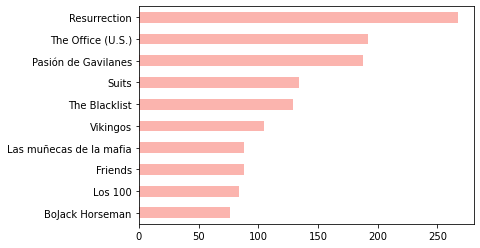

In [70]:
df.loc[df.Tipo == 'Serie'].part1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

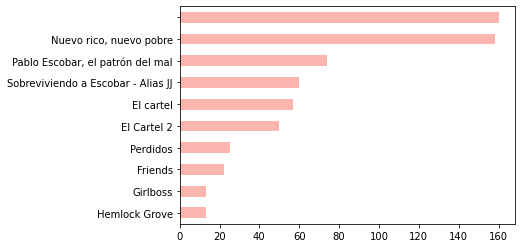

In [73]:
df.loc[df.Tipo == 'Pelicula'].part1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

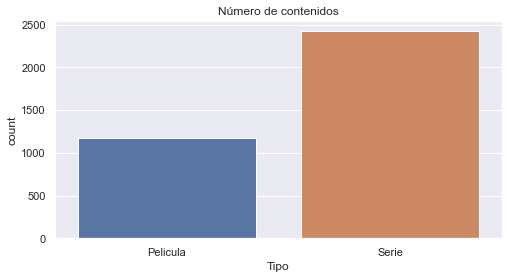

In [80]:
import matplotlib.pyplot as plt

sns.countplot(x=df.Tipo)

#figure = sns.figure(figsize=(8,6))
sns.set(rc={"figure.figsize":(12, 10)}) 

plt.title('Número de contenidos');

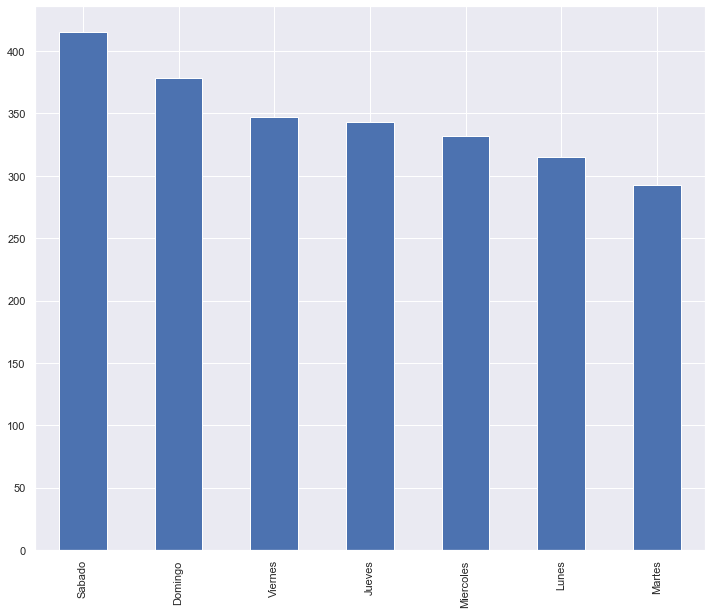

In [85]:
df.loc[df['Tipo'] == 'Serie','dia_semana'].value_counts(ascending=False).plot(kind='bar');

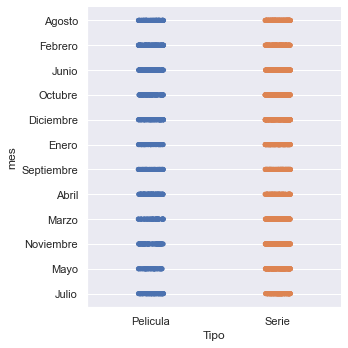

In [87]:
sns.catplot(x="Tipo",y='mes', data=df)

C:\Users\July\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\July\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


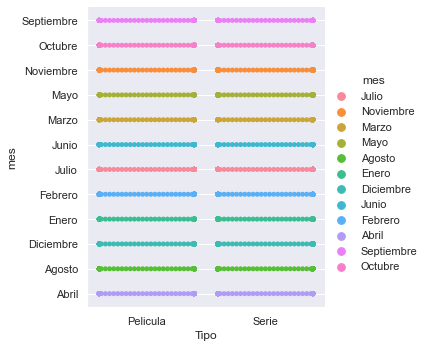

In [88]:
sns.catplot(x='Tipo',y='mes',hue='mes', kind='swarm', data=df);


In [90]:
sns.catplot(x='Tipo',y='mes',hue='mes',kind='boxen',data=df);

TypeError: Neither the `x` nor `y` variable appears to be numeric.

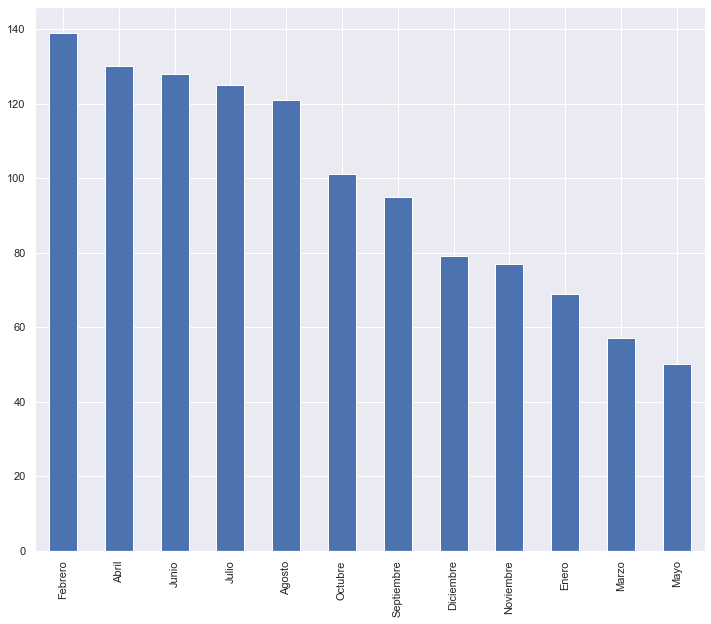

In [91]:
df.loc[df['Tipo'] == 'Pelicula','mes'].value_counts(ascending=False).plot(kind='bar');

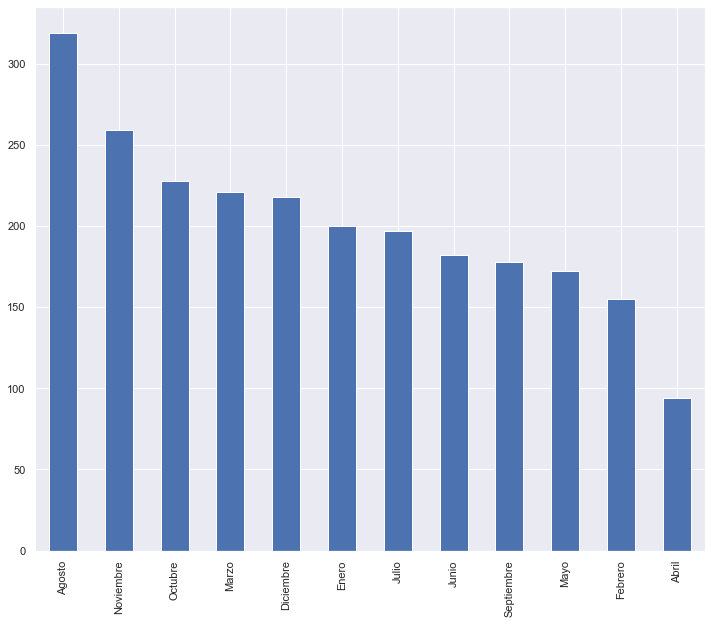

In [92]:
df.loc[df['Tipo'] == 'Serie','mes'].value_counts(ascending=False).plot(kind='bar');

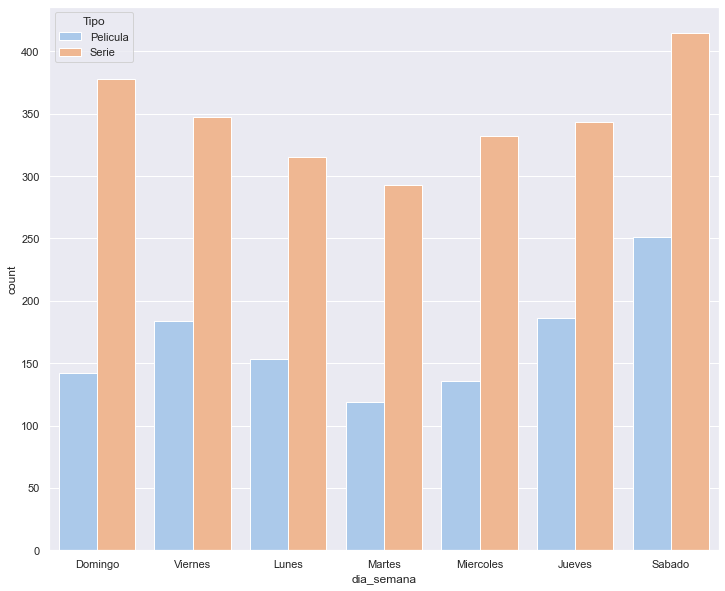

In [93]:
sns.countplot(data = df, x = 'dia_semana', hue = 'Tipo', palette= 'pastel');

ValueError: cannot set using a list-like indexer with a different length than the value

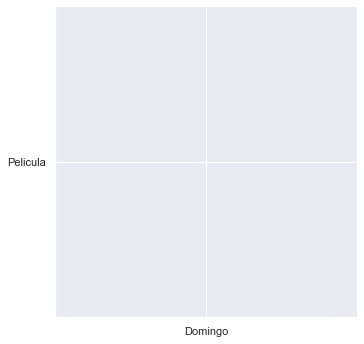

In [94]:
sns.relplot(x= "dia_semana", y= "Tipo", kind= "line", ci= None, hue= 'Tipo',  data= df);

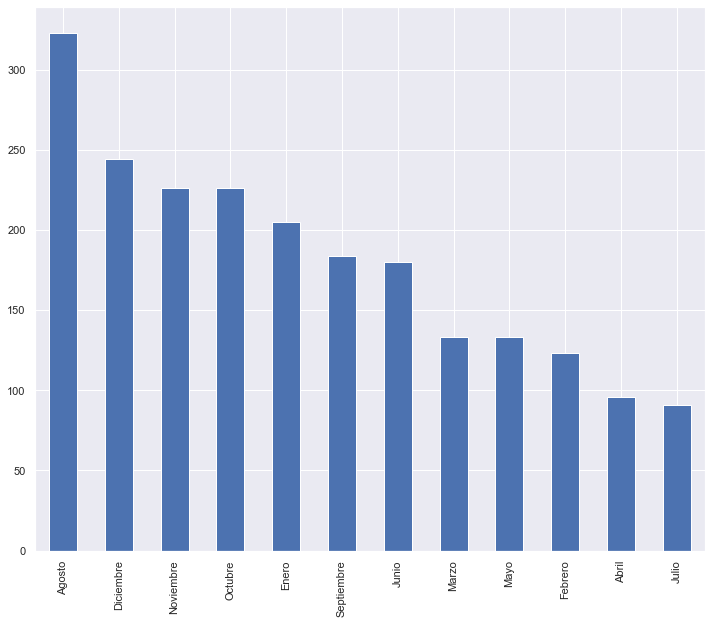

In [95]:
df.loc[df.año < 2021].mes.value_counts().plot.bar();

KeyError: 'Fecha'

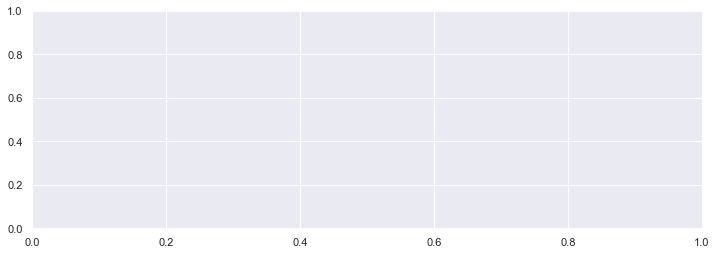

In [99]:
import datetime as dt
fig = plt.figure( figsize = (12, 4))
ax1 = fig.add_subplot(111)
dates = [df['Fecha'] + dt.timedelta(days=i) for i in range(1,373,31)]
values = np.random.rand(len(dates))
ax1.plot_date(dates, values, linestyle='-')

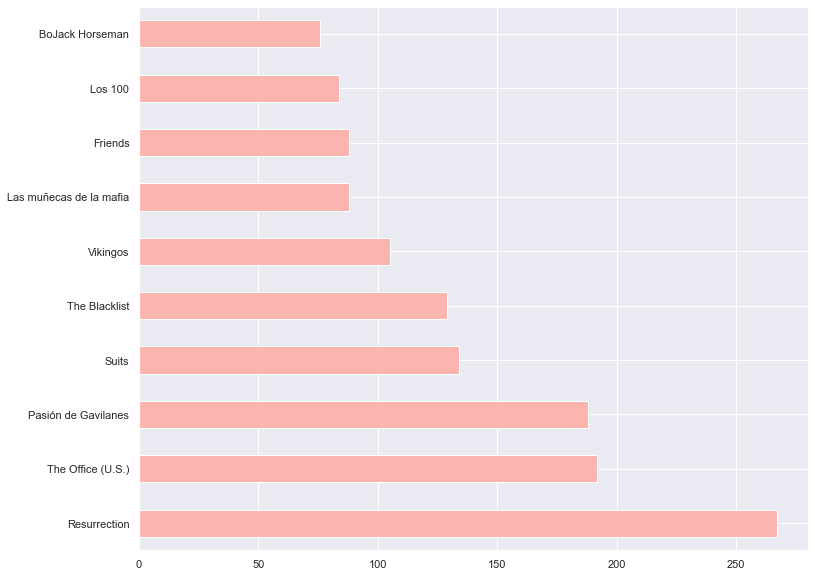

In [101]:
df.loc[df.Tipo == 'Serie'].part1.value_counts(ascending = False).head(10).plot.barh(cmap = 'Pastel1');

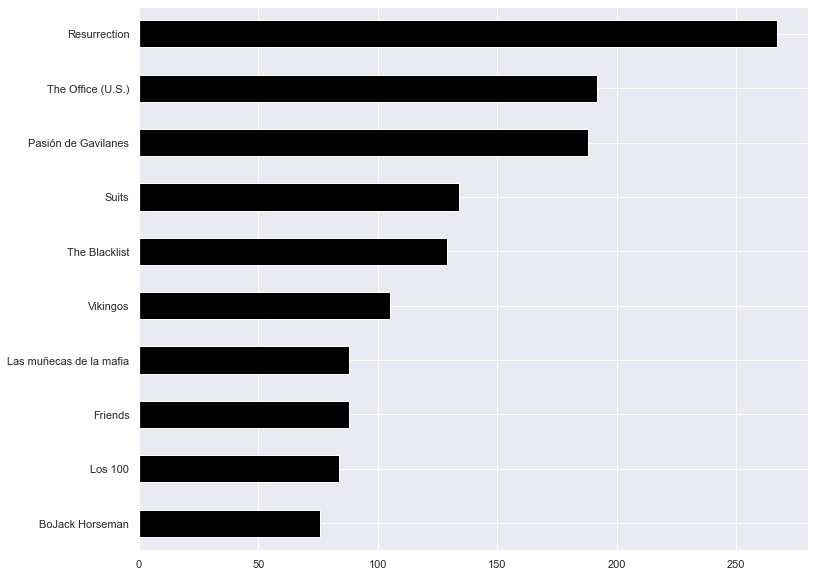

In [102]:
df.loc[df.Tipo == 'Serie'].part1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'afmhot');

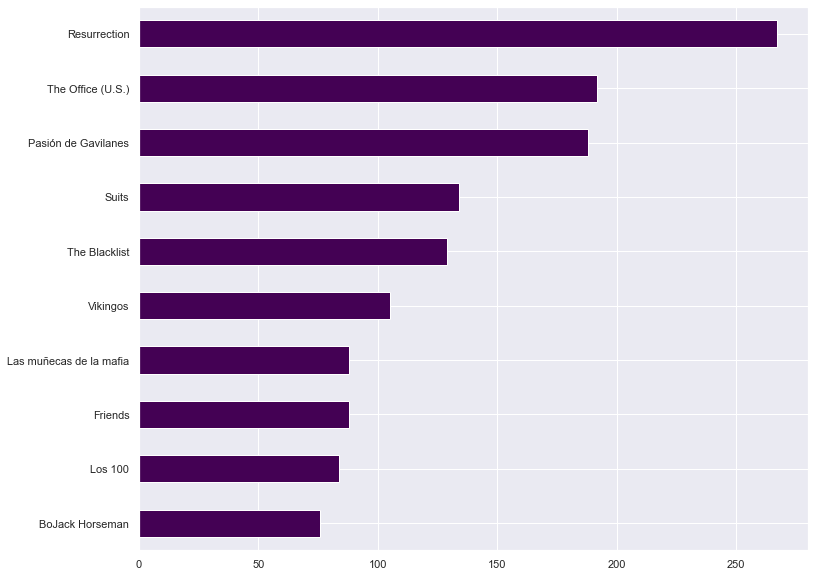

In [105]:
df.loc[df.Tipo == 'Serie'].part1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'viridis');